# Análise dos tipos de deficiência por zonas eleitorais em SJC - SP
* Análise de Dados Públicos

Base de dados utilizadas: https://www.tse.jus.br/eleicoes/estatisticas/repositorio-de-dados-eleitorais-1

* Importando as bibliotecas pandas e matplotlib para utilização em gráficos

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
low_memory=False
plt.style.use('seaborn')
%matplotlib inline
pd.options.display.max_columns = 80
pd.options.display.max_rows = 90

In [3]:
#Definido 'df' como variável do arquivo csv
arq = 'perfil_eleitor_deficiencia_2020_SP.csv'
df = pd.read_csv(arq, encoding='latin 1', delimiter=';')

In [4]:
#definindo o mucicípio do arquivo csv para ser analisado
dft_sjc = df.query('NM_MUNICIPIO =="SÃO JOSÉ DOS CAMPOS"')

In [5]:
dft_sjc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5784 entries, 50 to 444068
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   DT_GERACAO            5784 non-null   object
 1   HH_GERACAO            5784 non-null   object
 2   ANO_ELEICAO           5784 non-null   int64 
 3   SQ_ELEITOR            5784 non-null   int64 
 4   SG_UF                 5784 non-null   object
 5   CD_MUNICIPIO          5784 non-null   int64 
 6   NM_MUNICIPIO          5784 non-null   object
 7   CD_MUN_SIT_BIOMETRIA  5784 non-null   int64 
 8   DS_MUN_SIT_BIOMETRIA  5784 non-null   object
 9   NR_ZONA               5784 non-null   int64 
 10  NR_SECAO              5784 non-null   int64 
 11  CD_GENERO             5784 non-null   int64 
 12  DS_GENERO             5784 non-null   object
 13  CD_ESTADO_CIVIL       5784 non-null   int64 
 14  DS_ESTADO_CIVIL       5784 non-null   object
 15  CD_FAIXA_ETARIA       5784 non-null

In [6]:
dft_sjc.sample(10)

,DT_GERACAO,HH_GERACAO,ANO_ELEICAO,SQ_ELEITOR,SG_UF,CD_MUNICIPIO,NM_MUNICIPIO,CD_MUN_SIT_BIOMETRIA,DS_MUN_SIT_BIOMETRIA,NR_ZONA,NR_SECAO,CD_GENERO,DS_GENERO,CD_ESTADO_CIVIL,DS_ESTADO_CIVIL,CD_FAIXA_ETARIA,DS_FAIXA_ETARIA,CD_GRAU_ESCOLARIDADE,DS_GRAU_ESCOLARIDADE,ST_ELEITOR_BIOMETRIA,CD_TIPO_DEFICIENCIA,DS_TIPO_DEFICIENCIA
322015,01/08/2020,13:21:54,2020,367215429,SP,70998,SÃO JOSÉ DOS CAMPOS,0,Sem biometria,411,197,2,MASCULINO,1,SOLTEIRO,2000,20 anos,6,ENSINO MÉDIO COMPLETO,S,2,DEFICIÊNCIA DE LOCOMOÇÃO
384786,01/08/2020,13:21:54,2020,355074586,SP,70998,SÃO JOSÉ DOS CAMPOS,0,Sem biometria,127,590,4,FEMININO,1,SOLTEIRO,2000,20 anos,5,ENSINO MÉDIO INCOMPLETO,S,3,OUTROS
60216,01/08/2020,13:21:54,2020,10717654,SP,70998,SÃO JOSÉ DOS CAMPOS,0,Sem biometria,127,541,4,FEMININO,3,CASADO,8084,80 a 84 anos,1,ANALFABETO,N,2,DEFICIÊNCIA DE LOCOMOÇÃO
439764,01/08/2020,13:21:54,2020,315864481,SP,70998,SÃO JOSÉ DOS CAMPOS,0,Sem biometria,282,185,2,MASCULINO,1,SOLTEIRO,6569,65 a 69 anos,3,ENSINO FUNDAMENTAL INCOMPLETO,S,5,DEFICIÊNCIA AUDITIVA
296794,01/08/2020,13:21:54,2020,414248807,SP,70998,SÃO JOSÉ DOS CAMPOS,0,Sem biometria,127,117,4,FEMININO,1,SOLTEIRO,6064,60 a 64 anos,6,ENSINO MÉDIO COMPLETO,S,2,DEFICIÊNCIA DE LOCOMOÇÃO
33933,01/08/2020,13:21:54,2020,355617588,SP,70998,SÃO JOSÉ DOS CAMPOS,0,Sem biometria,282,186,4,FEMININO,3,CASADO,6569,65 a 69 anos,3,ENSINO FUNDAMENTAL INCOMPLETO,S,3,OUTROS
95897,01/08/2020,13:21:54,2020,408643736,SP,70998,SÃO JOSÉ DOS CAMPOS,0,Sem biometria,412,195,2,MASCULINO,3,CASADO,6569,65 a 69 anos,3,ENSINO FUNDAMENTAL INCOMPLETO,S,2,DEFICIÊNCIA DE LOCOMOÇÃO
95130,01/08/2020,13:21:54,2020,338381885,SP,70998,SÃO JOSÉ DOS CAMPOS,0,Sem biometria,282,58,2,MASCULINO,3,CASADO,6569,65 a 69 anos,3,ENSINO FUNDAMENTAL INCOMPLETO,S,3,OUTROS
221784,01/08/2020,13:21:54,2020,332098670,SP,70998,SÃO JOSÉ DOS CAMPOS,0,Sem biometria,282,179,2,MASCULINO,1,SOLTEIRO,2124,21 a 24 anos,1,ANALFABETO,S,3,OUTROS
125764,01/08/2020,13:21:54,2020,144386850,SP,70998,SÃO JOSÉ DOS CAMPOS,0,Sem biometria,412,94,4,FEMININO,5,VIÚVO,9094,90 a 94 anos,2,LÊ E ESCREVE,N,2,DEFICIÊNCIA DE LOCOMOÇÃO


In [7]:
dft_sjc = df.query('NM_MUNICIPIO =="SÃO JOSÉ DOS CAMPOS"')[['NR_ZONA', 'DS_TIPO_DEFICIENCIA']]

<AxesSubplot:title={'center':'Zonas eleitorais de São José dos Campos'}, ylabel='NR_ZONA'>

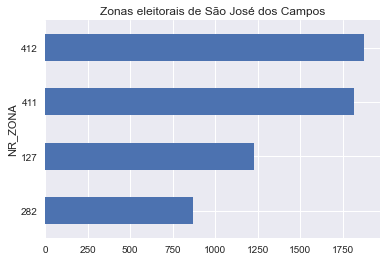

In [8]:
#Apresentação das zonas eleitorais do municipio de São José dos Campos
dft_sjc.groupby("NR_ZONA").size().sort_values().tail(4).plot(kind='barh', title='Zonas eleitorais de São José dos Campos')

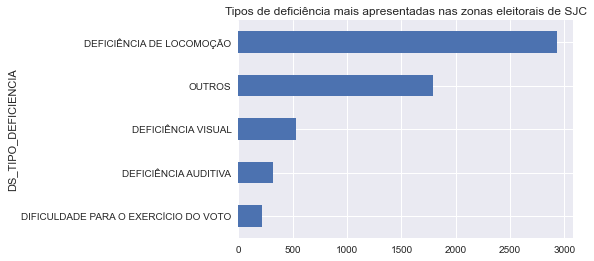

In [9]:
dft_t_sjc = dft_sjc.groupby("DS_TIPO_DEFICIENCIA").size().sort_values().plot(kind='barh', title='Tipos de deficiência mais apresentadas nas zonas eleitorais de SJC')

<AxesSubplot:title={'center':'Tipos de deficiência mais apresentados na zona eleitoral 412'}>

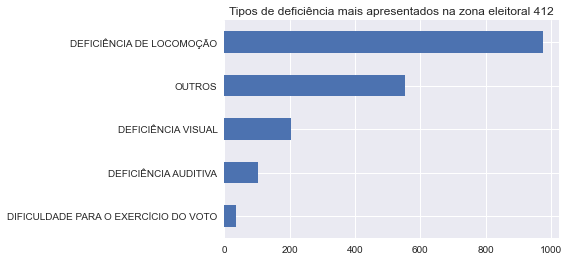

In [10]:
dft_sjc.query("NR_ZONA == '412'")['DS_TIPO_DEFICIENCIA'].value_counts().sort_values().plot(kind='barh', title="Tipos de deficiência mais apresentados na zona eleitoral 412")

<AxesSubplot:title={'center':'Tipos de deficiência mais apresentados na zona eleitoral 411'}>

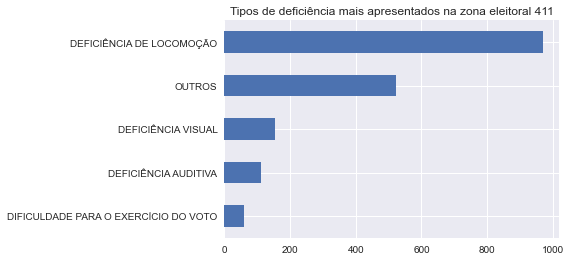

In [12]:
dft_sjc.query("NR_ZONA == '411'")['DS_TIPO_DEFICIENCIA'].value_counts().sort_values().plot(kind='barh', title="Tipos de deficiência mais apresentados na zona eleitoral 411")

<AxesSubplot:title={'center':'Tipos de deficiência mais apresentados na zona 127'}>

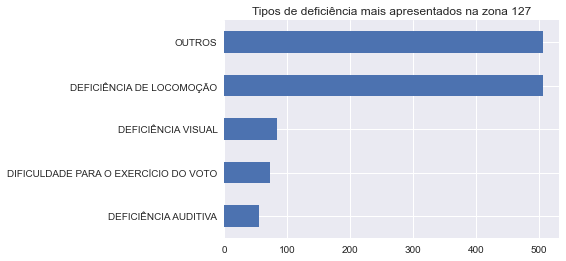

In [13]:
dft_sjc.query("NR_ZONA == '127'")['DS_TIPO_DEFICIENCIA'].value_counts().sort_values().plot(kind='barh', title="Tipos de deficiência mais apresentados na zona 127")

<AxesSubplot:title={'center':'Tipos de deficiência mais apresentados na zona eleitoral 282'}>

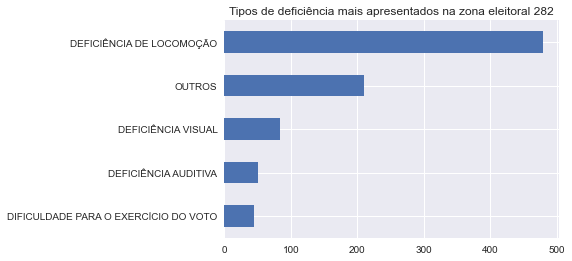

In [14]:
dft_sjc.query("NR_ZONA == '282'")['DS_TIPO_DEFICIENCIA'].value_counts().sort_values().plot(kind='barh', title="Tipos de deficiência mais apresentados na zona eleitoral 282")

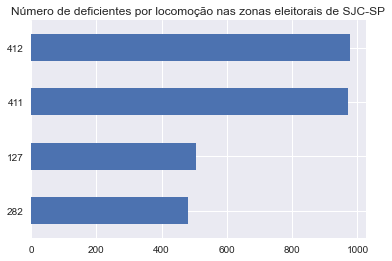

In [15]:
dft_t_sjc = dft_sjc.query("DS_TIPO_DEFICIENCIA =='DEFICIÊNCIA DE LOCOMOÇÃO'")['NR_ZONA'].value_counts().sort_values().plot(kind='barh', title="Número de deficientes por locomoção nas zonas eleitorais de SJC-SP")

<AxesSubplot:title={'center':'Número de deficientes visuais nas zonas eleitorais de SJC-SP'}>

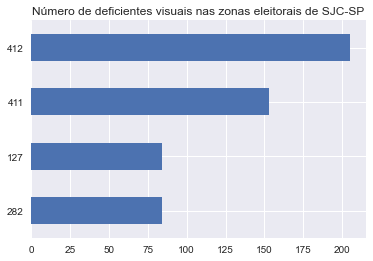

In [16]:
dft_sjc.query("DS_TIPO_DEFICIENCIA =='DEFICIÊNCIA VISUAL'")['NR_ZONA'].value_counts().sort_values().plot(kind='barh', title="Número de deficientes visuais nas zonas eleitorais de SJC-SP")

<AxesSubplot:title={'center':'Número de deficientes auditivos nas zonas eleitorais de SJC-SP'}>

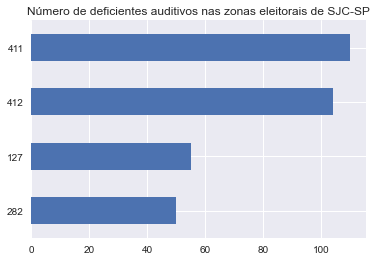

In [17]:
dft_sjc.query("DS_TIPO_DEFICIENCIA =='DEFICIÊNCIA AUDITIVA'")['NR_ZONA'].value_counts().sort_values().plot(kind='barh', title="Número de deficientes auditivos nas zonas eleitorais de SJC-SP")